This is a project reproduced from a post on Medium [Here](https://medium.com/free-code-camp/understanding-my-browsing-pattern-using-pandas-and-seaborn-162b97e33e51)

I used the [Google takeout](https://takeout.google.com/) to export my browsing history data.

#### Step 1: Loading raw data:

In [1]:
import json
import datetime
import pandas as pd
with open(r"C:\Users\liuyu\OneDrive\Kaggle Projects\Browsing Data\takeout-20210412T222313Z-001\Takeout\Chrome\BrowserHistory.json", encoding = 'UTF-8') as f:
    data = json.loads(f.read())
    df = pd.DataFrame(data["Browser History"])

In [2]:
df.head()

,favicon_url,page_transition,title,url,client_id,time_usec
0,https://www.google.com/favicon.ico,LINK,Google Takeout,https://takeout.google.com/?pli=1,46BWj3XXPZpkqnQqI50hzw==,1618266135904854
1,https://www.google.com/favicon.ico,LINK,Google Takeout,https://takeout.google.com/?pli=1,46BWj3XXPZpkqnQqI50hzw==,1618266132374504
2,https://www.google.com/favicon.ico,LINK,Google Takeout,https://takeout.google.com/?pli=1,46BWj3XXPZpkqnQqI50hzw==,1618266098789958
3,https://github.githubassets.com/favicons/favic...,LINK,john-kurkowski/tldextract: Accurately separate...,https://github.com/john-kurkowski/tldextract,46BWj3XXPZpkqnQqI50hzw==,1618266026629624
4,https://www.youtube.com/s/desktop/07288e99/img...,LINK,"(2) 5 HOUR STUDY WITH ME | Background noise, B...",https://www.youtube.com/watch?v=ARTIdxZrUJ4&ab...,46BWj3XXPZpkqnQqI50hzw==,1618265577446424


In [3]:
df.drop(columns = ['client_id', 'favicon_url'])

,page_transition,title,url,time_usec
0,LINK,Google Takeout,https://takeout.google.com/?pli=1,1618266135904854
1,LINK,Google Takeout,https://takeout.google.com/?pli=1,1618266132374504
2,LINK,Google Takeout,https://takeout.google.com/?pli=1,1618266098789958
3,LINK,john-kurkowski/tldextract: Accurately separate...,https://github.com/john-kurkowski/tldextract,1618266026629624
4,LINK,"(2) 5 HOUR STUDY WITH ME | Background noise, B...",https://www.youtube.com/watch?v=ARTIdxZrUJ4&ab...,1618265577446424
...,...,...,...,...
34333,LINK,Facecheck -,https://go.overwolf.com/facecheck-bfb/?utm_sou...,1586734112184739
34334,LINK,Beluga Whale Has A Crush On A Cute Zookeeper |...,https://www.youtube.com/watch?v=PG-q9avfxrc,1586734078463293
34335,LINK,YouTube,https://www.youtube.com/,1586734025076493
34336,LINK,Meet My 2 NEW Pomeranian Puppies! 🐶 - YouTube,https://www.youtube.com/watch?v=QhbR5TEAMco,1586733920359498


In [4]:
def convert_time(x):
    return datetime.datetime.fromtimestamp(x/1000000)

df['Date'] = df['time_usec'].apply(convert_time)

In [5]:
import tldextract
def get_domain(x):
    result = tldextract.extract(x)
    sub_domain = result[0]
    domain = result[1]
    if sub_domain == "mail":
        return sub_domain + "." + domain
    # Ugly hack to differentiate b/w drive.google.com and google.com
    if domain == "google" and sub_domain=="www":
        return "google_search" 
    return domain

df['Domain'] = df['url'].apply(get_domain)

In [7]:
df["Domain"].value_counts(normalize = True)

youtube             0.231056
google_search       0.101433
amazon              0.061477
newtab              0.055099
mail.google         0.042518
                      ...   
goodhousekeeping    0.000029
pensachi            0.000029
cybercoders         0.000029
gk100               0.000029
nyc                 0.000029
Name: Domain, Length: 968, dtype: float64

In [8]:
top_10_domain = df["Domain"].value_counts(normalize = True).sort_values(ascending = False).iloc[:10]
last_10_domain = df["Domain"].value_counts(normalize = True).sort_values(ascending = True).iloc[:10]
top_10_domain.index

Index(['youtube', 'google_search', 'amazon', 'newtab', 'mail.google',
       'linkedin', 'instacart', 'google', 'mfa', 'dealmoon'],
      dtype='object')

In [9]:
top_10_domain

youtube          0.231056
google_search    0.101433
amazon           0.061477
newtab           0.055099
mail.google      0.042518
linkedin         0.034947
instacart        0.031306
google           0.018464
mfa              0.017677
dealmoon         0.015347
Name: Domain, dtype: float64

Text(0, 0.5, 'Percentage')

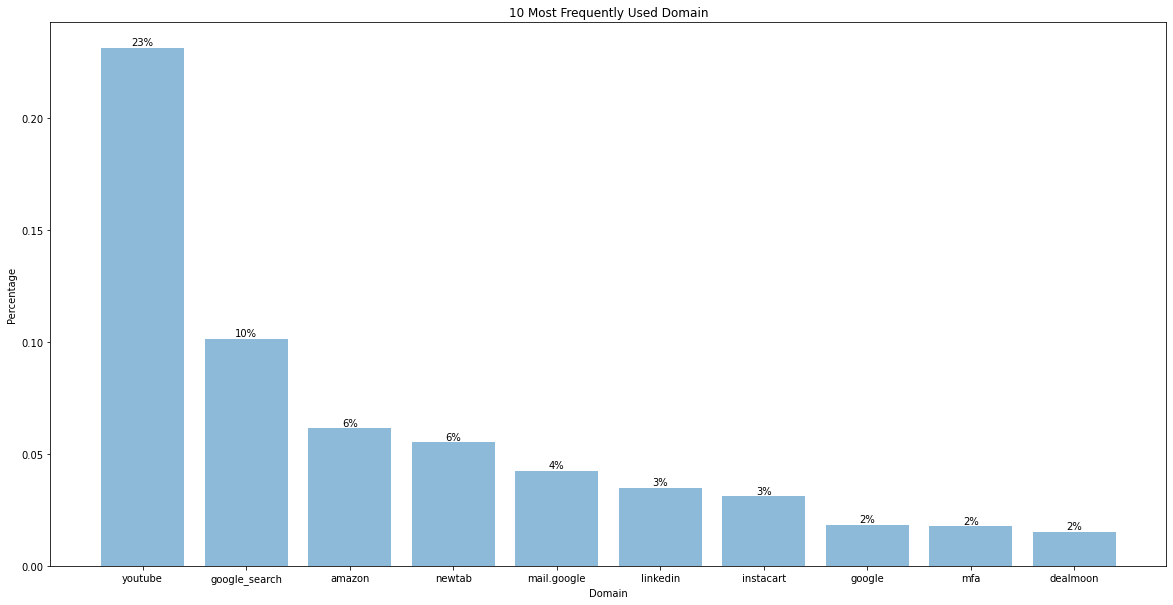

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot = plt.bar(top_10_domain.index, top_10_domain, align='center', alpha=0.5)
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height, "{0:.0%}".format(height), ha='center', va='bottom')
plt.title("10 Most Frequently Used Domain")
plt.xlabel("Domain")
plt.ylabel("Percentage")

I was wondering what are those `"mfa"` domains, so I selected those data and looked at the titles.

In [11]:
df[df["Domain"] == 'mfa']["title"].value_counts(normalize = True)

海外申请护照在线预约        0.947282
预约窗口              0.029654
预约信息确认            0.006590
照片规格说明            0.004942
海外申请护照在线预约系统      0.004942
中国领事服务网           0.003295
出国及海外中国公民自愿登记     0.001647
在美遭遇电信诈骗应如何处理？    0.001647
Name: title, dtype: float64

Looks like they are websites for my passport renewal...

### Investigate `"page_transition"` column

In [12]:
page_transition_dist = df["page_transition"].value_counts(normalize = True)

<AxesSubplot:ylabel='page_transition'>

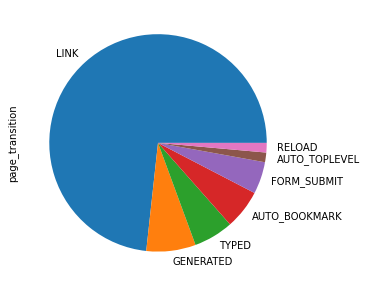

In [13]:
page_transition_dist.plot.pie(figsize=(5, 5))

Now that I know most of my web pages are opened by `"LINK"` (clicking through links), I want to see within each domain, does overall trend still be consistent?

In [14]:
cols = top_10_domain.index
stacked_bar = pd.DataFrame(index=page_transition_dist.index, columns = cols)

In [15]:
for c in stacked_bar.columns:
    stacked_bar[c] = df[df["Domain"] == c]['page_transition'].value_counts()

In [16]:
stacked_bar

,youtube,google_search,amazon,newtab,mail.google,linkedin,instacart,google,mfa,dealmoon
LINK,6359.0,468.0,1591.0,NaN,1097.0,1120.0,1040.0,613.0,495.0,310.0
GENERATED,NaN,2520.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TYPED,10.0,NaN,70.0,1500.0,144.0,76.0,29.0,2.0,NaN,NaN
AUTO_BOOKMARK,1482.0,2.0,38.0,NaN,190.0,NaN,NaN,NaN,NaN,170.0
FORM_SUBMIT,NaN,459.0,403.0,NaN,NaN,1.0,NaN,11.0,1.0,43.0
AUTO_TOPLEVEL,13.0,NaN,NaN,388.0,NaN,NaN,NaN,2.0,13.0,NaN
RELOAD,70.0,34.0,9.0,4.0,29.0,3.0,6.0,6.0,98.0,4.0


<AxesSubplot:>

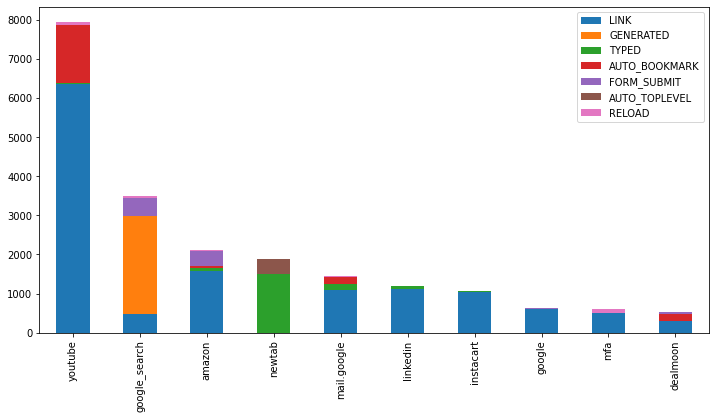

In [17]:
stacked_bar.T.plot.bar(stacked=True, figsize=(12,6))

The trend is not consistent in `"google_search"` and `"newtab"` domains and it is reasonable as I always type in the questions I want to ask in Google Search.

### Investigate Weekday vs. Weekend Browsing Usage

In [18]:
days_arr = ["Mon", "Tue",  "Wed",  "Thu", "Fri", "Sat", "Sun"]
def get_day_of_week(x):
    return days_arr[x.weekday()]

def get_month(x):
    return x.month

def get_year(x):
    return x.year

def get_day(x):
    return x.day

def get_hour(x):
    return x.hour


df["year"] = df["Date"].apply(get_year)
df["month"] = df["Date"].apply(get_month)
df["day"] = df["Date"].apply(get_day)
df["day_of_week"] = df["Date"].apply(get_day_of_week)
df["hour"] = df["Date"].apply(get_hour)

In [20]:
df["weekday"] = "Yes"
condition = (df["day_of_week"] == "Sat") | (df["day_of_week"] == "Sun")
df.loc[condition, "weekday"] = "No"

In [21]:
df["weekday"].value_counts(normalize = True)

Yes    0.806978
No     0.193022
Name: weekday, dtype: float64

<AxesSubplot:xlabel='hour', ylabel='count'>

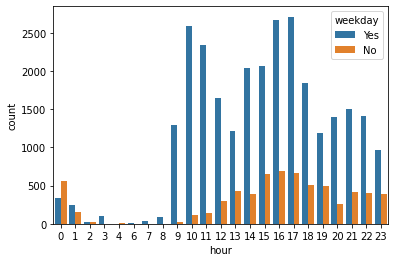

In [22]:
import seaborn as sns
sns.countplot(x = 'hour', hue = 'weekday', data=df)

#### Observation:
I doubt that this graph is a fair comparison as Weekday is naturally more than Weekends (5 days vs. 2 days). So if we are comparing the browsing usage by looking at "count", it is probably not a good idea. It would be better to compare average usage per day of weekday and weekends.

In [23]:
def refomat_date(x):
    return x.strftime('%Y-%m-%d')

df["Date_2"] = df["Date"].apply(refomat_date)

In [25]:
weekday_cnt = len(df[df["weekday"] == "Yes"]["Date_2"].unique())
weekend_cnt = len(df[df["weekday"] == "No"]["Date_2"].unique())

In [26]:
df["weekday"].value_counts()

Yes    27710
No      6628
Name: weekday, dtype: int64

In [27]:
weekday_cnt

253

In [29]:
weekend_cnt

105

In [31]:
data = {'Weekday':['Yes', 'No'],
        'Browsing_cnt':[27710, 6628],
        'Day_cnt': [253, 105]}
df_wk_day = pd.DataFrame(data)

In [33]:
df_wk_day['Avg_usage'] = df_wk_day['Browsing_cnt'] / df_wk_day['Day_cnt']

In [34]:
df_wk_day

,Weekday,Browsing_cnt,Day_cnt,Avg_usage
0,Yes,27710,253,109.525692
1,No,6628,105,63.123810


### Investigate More on Usage by day of week and hour

I will create a heatmap with one axis to be `"day_of_week"` and another to be `"hour"`.

In [45]:
df_heat = df.groupby(["hour", "day_of_week"])["Domain"].size().reset_index()

In [48]:
df_heat2 = df_heat.pivot("hour", "day_of_week", "Domain")

<AxesSubplot:xlabel='day_of_week', ylabel='hour'>

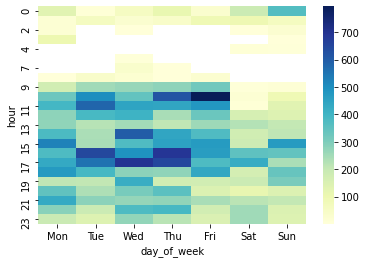

In [53]:
sns.heatmap(df_heat2[days_arr] , cmap="YlGnBu")

#### Observation:

Majority usage concentrated from 9am to 6pm. Apparently weekends usage is much lighter than weekdays, and the start time on weekends usually afternoon.